In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Aggregate Observations 

In [3]:
file = '/glade/work/mollyw/Projects/cice-scm-da/data/processed/synthetic_obs/free_test/netcdfs/aggregate_observations.nc'
ds = xr.open_dataset(file)

### Temporal Line Plots 

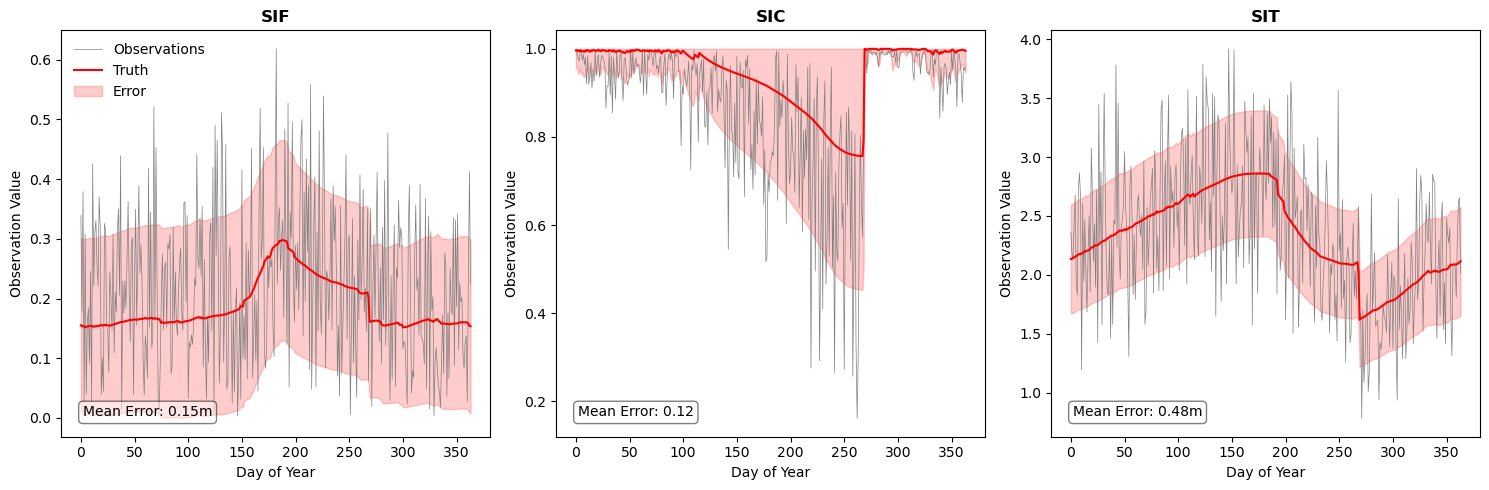

In [6]:
fig, ax = plt.subplots(1,len(list(np.unique(ds.obs_type))),figsize=(15,5))

obs_names = ['SIF', 'SIC','SIT']
units = ['m','','m']

count  = 0
for ob_ind in list(np.unique(ds.obs_type)):
    type = ds.observations.where(ds.obs_type == ob_ind, drop=True)

    obs   = type.sel({'copy':1})
    truth = type.sel({'copy':2})
    error = type.sel({'copy':3})

    ax[count].plot(obs,label='Observations', color = 'grey', lw = 0.5)
    ax[count].plot(truth,label='Truth', color = 'red', lw = 1.5)
    if ob_ind == 27:
        ax[count].fill_between(x = np.arange(0,364), y1=truth-np.sqrt(error), y2=np.ones(len(truth)), color = 'red', alpha = 0.2, label = 'Error')
    else:
        ax[count].fill_between(x = np.arange(0,364), y1=truth-np.sqrt(error), y2=truth+np.sqrt(error), color = 'red', alpha = 0.2, label = 'Error')  

    ax[count].set_title(obs_names[count], fontweight='bold')
    ax[count].set_xlabel('Day of Year')
    ax[count].set_ylabel('Observation Value')

    # display the mean error value for each observation type in the lower right corner
    ax[count].text(0.05, 0.05, 'Mean Error: ' + str(np.round(np.mean(np.sqrt(error)).values,2)) + units[count], 
                   transform=ax[count].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    count +=1

ax[count-3].legend(frameon=False, loc = 'upper left')

plt.tight_layout()

### Histograms

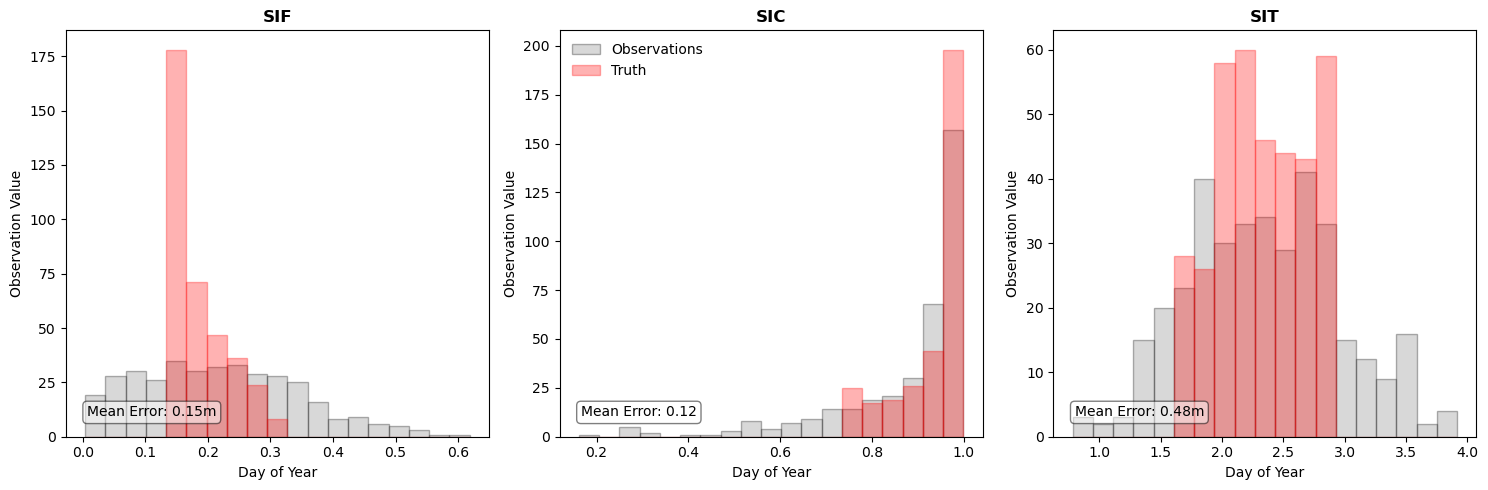

In [8]:
fig, ax = plt.subplots(1,len(list(np.unique(ds.obs_type))),figsize=(15,5))

obs_names = ['SIF', 'SIC','SIT']
units = ['m','','m']

count  = 0
for ob_ind in list(np.unique(ds.obs_type)):
    type = ds.observations.where(ds.obs_type == ob_ind, drop=True)

    obs   = type.sel({'copy':1})
    truth = type.sel({'copy':2})
    error = type.sel({'copy':3})

    binwidth = np.linspace(min(obs), max(obs), 20)

    ax[count].hist(obs,label='Observations', 
                   color = 'grey', edgecolor = 'black',
                   alpha = 0.3, bins = binwidth)
    ax[count].hist(truth,label='Truth', 
                   color = 'red', edgecolor = 'red',
                   alpha = 0.3, bins = binwidth)
  
    ax[count].set_title(obs_names[count], fontweight='bold')
    ax[count].set_xlabel('Day of Year')
    ax[count].set_ylabel('Observation Value')

    # display the mean error value for each observation type in the lower right corner
    ax[count].text(0.05, 0.05, 'Mean Error: ' + str(np.round(np.mean(np.sqrt(error)).values,2)) + units[count], 
                   transform=ax[count].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    count +=1

ax[count-2].legend(frameon=False, loc = 'upper left')

plt.tight_layout()

## ITD Observations

In [2]:
file = '/glade/work/mollyw/Projects/cice-scm-da/data/processed/synthetic_obs/free_test/netcdfs/itd_observations.nc'
ds = xr.open_dataset(file)

### Temporal Line Plots

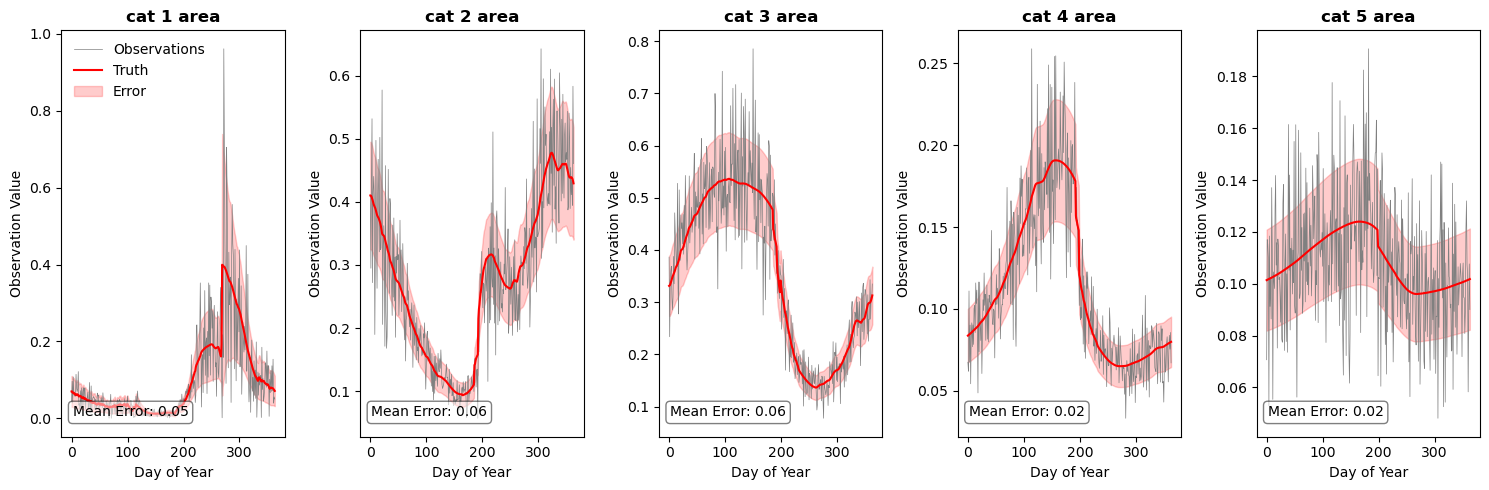

In [27]:
obs_types = ['AICE01', 'AICE02', 'AICE03', 'AICE04', 'AICE05']
obs_names = ['cat 1 area', 'cat 2 area', 'cat 3 area', 'cat 4 area', 'cat 5 area']
units = ['','','','','']

fig, ax = plt.subplots(1,len(obs_types),figsize=(15,5))

count = 0 
for ob in obs_types:
    ind = list.index(list(ds.ObsTypesMetaData.values), bytes('SAT_SEAICE_'+ob+'               ','utf-8')) + 1
    
    type = ds.observations.where(ds.obs_type == ind, drop=True)

    obs   = type.sel({'copy':1})
    truth = type.sel({'copy':2})
    error = type.sel({'copy':3})

    ax[count].plot(obs,label='Observations', color = 'grey', lw = 0.5)
    ax[count].plot(truth,label='Truth', color = 'red', lw = 1.5)
    if ob_ind == 27:
        ax[count].fill_between(x = np.arange(0,364), y1=truth-np.sqrt(error), y2=np.ones(len(truth)), color = 'red', alpha = 0.2, label = 'Error')
    else:
        ax[count].fill_between(x = np.arange(0,364), y1=truth-np.sqrt(error), y2=truth+np.sqrt(error), color = 'red', alpha = 0.2, label = 'Error')  

    ax[count].set_title(obs_names[count], fontweight='bold')
    ax[count].set_xlabel('Day of Year')
    ax[count].set_ylabel('Observation Value')

    # display the mean error value for each observation type in the lower right corner
    ax[count].text(0.05, 0.05, 'Mean Error: ' + str(np.round(np.mean(np.sqrt(error)).values,2)) + units[count], 
                   transform=ax[count].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    count +=1

ax[count-5].legend(frameon=False, loc = 'upper left')

plt.tight_layout()
    

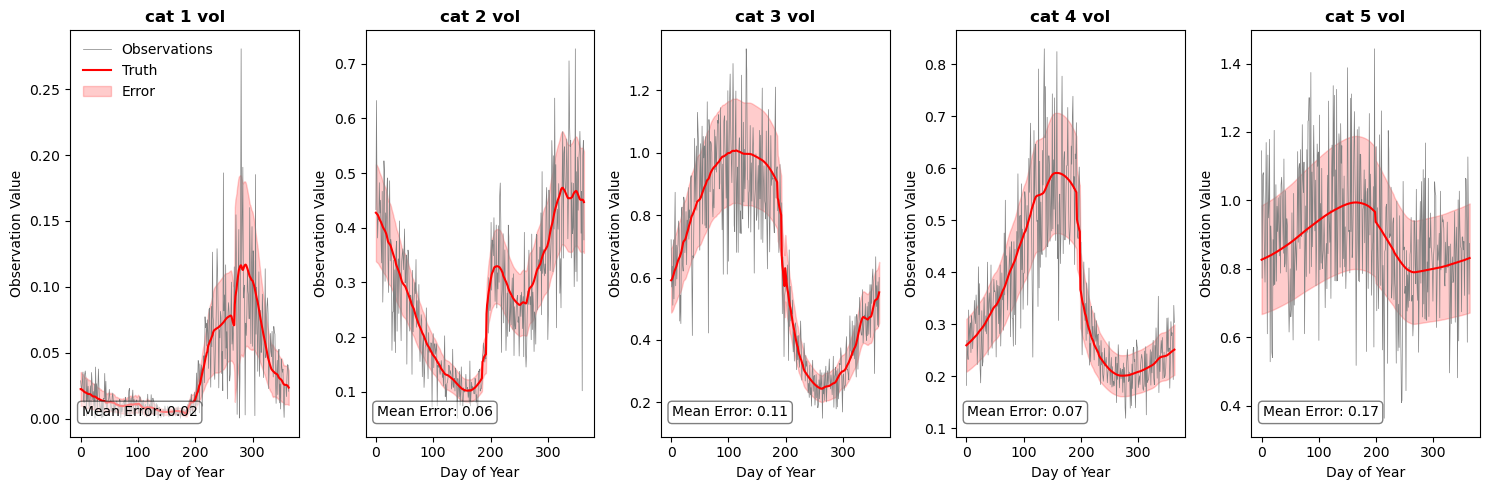

In [28]:
obs_types = ['VICE01', 'VICE02', 'VICE03', 'VICE04', 'VICE05']
obs_names = ['cat 1 vol', 'cat 2 vol', 'cat 3 vol', 'cat 4 vol', 'cat 5 vol']
units = ['','','','','']

fig, ax = plt.subplots(1,len(obs_types),figsize=(15,5))

count = 0 
for ob in obs_types:
    ind = list.index(list(ds.ObsTypesMetaData.values), bytes('SAT_SEAICE_'+ob+'               ','utf-8')) + 1
    
    type = ds.observations.where(ds.obs_type == ind, drop=True)

    obs   = type.sel({'copy':1})
    truth = type.sel({'copy':2})
    error = type.sel({'copy':3})

    ax[count].plot(obs,label='Observations', color = 'grey', lw = 0.5)
    ax[count].plot(truth,label='Truth', color = 'red', lw = 1.5)
    if ob_ind == 27:
        ax[count].fill_between(x = np.arange(0,364), y1=truth-np.sqrt(error), y2=np.ones(len(truth)), color = 'red', alpha = 0.2, label = 'Error')
    else:
        ax[count].fill_between(x = np.arange(0,364), y1=truth-np.sqrt(error), y2=truth+np.sqrt(error), color = 'red', alpha = 0.2, label = 'Error')  

    ax[count].set_title(obs_names[count], fontweight='bold')
    ax[count].set_xlabel('Day of Year')
    ax[count].set_ylabel('Observation Value')

    # display the mean error value for each observation type in the lower right corner
    ax[count].text(0.05, 0.05, 'Mean Error: ' + str(np.round(np.mean(np.sqrt(error)).values,2)) + units[count], 
                   transform=ax[count].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    count +=1

ax[count-5].legend(frameon=False, loc = 'upper left')

plt.tight_layout()

### Histograms

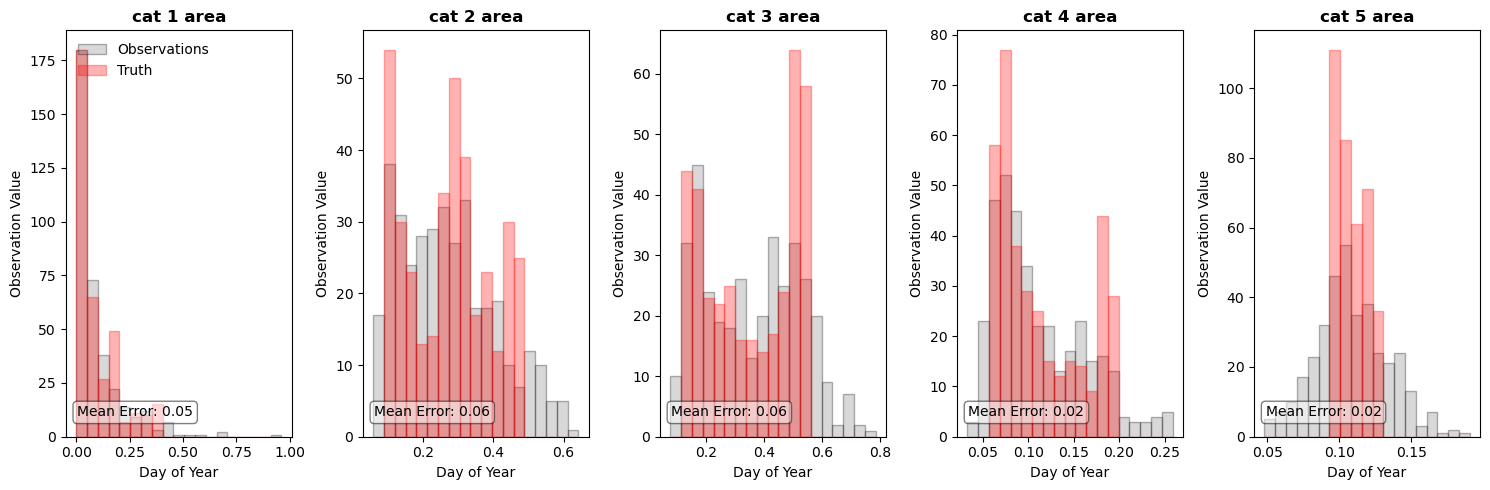

In [4]:
obs_types = ['AICE01', 'AICE02', 'AICE03', 'AICE04', 'AICE05']
obs_names = ['cat 1 area', 'cat 2 area', 'cat 3 area', 'cat 4 area', 'cat 5 area']
units = ['','','','','']

fig, ax = plt.subplots(1,len(obs_types),figsize=(15,5))

count = 0 
for ob in obs_types:
    ind = list.index(list(ds.ObsTypesMetaData.values), bytes('SAT_SEAICE_'+ob+'               ','utf-8')) + 1
    
    type = ds.observations.where(ds.obs_type == ind, drop=True)

    obs   = type.sel({'copy':1})
    truth = type.sel({'copy':2})
    error = type.sel({'copy':3})

    binwidth = np.linspace(min(obs), max(obs), 20)

    ax[count].hist(obs,label='Observations', 
                   color = 'grey', edgecolor = 'black',
                   alpha = 0.3, bins = binwidth)
    ax[count].hist(truth,label='Truth', 
                   color = 'red', edgecolor = 'red',
                   alpha = 0.3, bins = binwidth)
   
    ax[count].set_title(obs_names[count], fontweight='bold')
    ax[count].set_xlabel('Day of Year')
    ax[count].set_ylabel('Observation Value')

    # display the mean error value for each observation type in the lower right corner
    ax[count].text(0.05, 0.05, 'Mean Error: ' + str(np.round(np.mean(np.sqrt(error)).values,2)) + units[count], 
                   transform=ax[count].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    count +=1

ax[count-5].legend(frameon=False, loc = 'upper left')

plt.tight_layout()

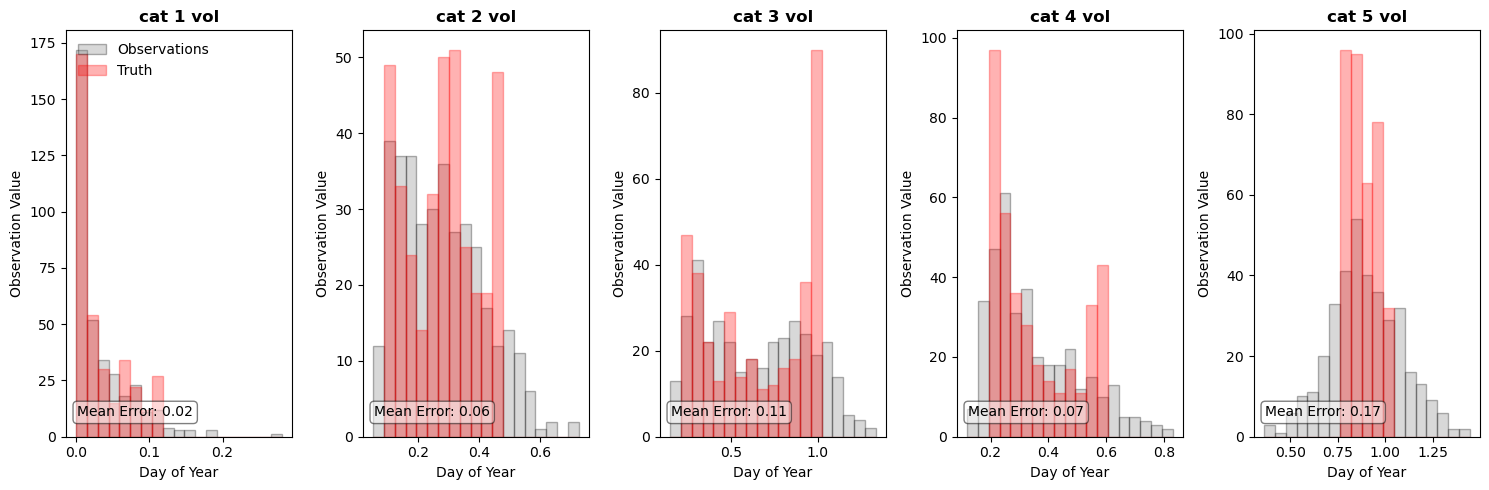

In [3]:
obs_types = ['VICE01', 'VICE02', 'VICE03', 'VICE04', 'VICE05']
obs_names = ['cat 1 vol', 'cat 2 vol', 'cat 3 vol', 'cat 4 vol', 'cat 5 vol']
units = ['','','','','']

fig, ax = plt.subplots(1,len(obs_types),figsize=(15,5))

count = 0 
for ob in obs_types:
    ind = list.index(list(ds.ObsTypesMetaData.values), bytes('SAT_SEAICE_'+ob+'               ','utf-8')) + 1
    
    type = ds.observations.where(ds.obs_type == ind, drop=True)

    obs   = type.sel({'copy':1})
    truth = type.sel({'copy':2})
    error = type.sel({'copy':3})

    binwidth = np.linspace(min(obs), max(obs), 20)

    ax[count].hist(obs,label='Observations', 
                   color = 'grey', edgecolor = 'black',
                   alpha = 0.3, bins = binwidth)
    ax[count].hist(truth,label='Truth', 
                   color = 'red', edgecolor = 'red',
                   alpha = 0.3, bins = binwidth)
   
    ax[count].set_title(obs_names[count], fontweight='bold')
    ax[count].set_xlabel('Day of Year')
    ax[count].set_ylabel('Observation Value')

    # display the mean error value for each observation type in the lower right corner
    ax[count].text(0.05, 0.05, 'Mean Error: ' + str(np.round(np.mean(np.sqrt(error)).values,2)) + units[count], 
                   transform=ax[count].transAxes, fontsize=10,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    count +=1

ax[count-5].legend(frameon=False, loc = 'upper left')

plt.tight_layout()